# Попробуем по статистике приложений угадывать их рейтинг.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
url = 'googleplaystore.csv'
data = pd.read_csv(url, sep = ',', engine='python')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Удалим лишнее столбцы.

In [4]:
data = data.drop('Genres', axis = 1)\
            .drop('Last Updated', axis = 1)\
           .drop('Current Ver',    axis = 1)\
           .drop('Android Ver', axis = 1) \
            .drop('App', axis = 1) \
            .drop('Type', axis = 1)
data.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",0,Everyone
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,Everyone
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0,Everyone
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0,Teen
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0,Everyone


# Начнём подготовку данных.
Для начала приведём типы столбцов к желаемым.

In [5]:
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data['Size'] = data['Size'].str.extract('(\d+)')
data['Size'] = pd.to_numeric(data['Size'], errors='coerce')
data['Installs'] = data['Installs'].str.replace('[,+]', '')
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')
data['Price'] = data['Price'].str.replace('[$]', '')
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating
0,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,0.0,Everyone
1,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,0.0,Everyone
2,ART_AND_DESIGN,4.7,87510.0,8.0,5000000.0,0.0,Everyone
3,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,0.0,Teen
4,ART_AND_DESIGN,4.3,967.0,2.0,100000.0,0.0,Everyone


In [6]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Category', 'Content Rating']
['Rating', 'Reviews', 'Size', 'Installs', 'Price']


In [7]:
for c in categorical_columns:
    print(c, data[c].unique())

Category ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
Content Rating ['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated'
 nan]


Заполним пропущенные значения.

In [11]:
data.median(axis = 0)

Rating           4.3
Reviews       2094.0
Size            15.0
Installs    100000.0
Price            0.0
dtype: float64

In [12]:
data = data.fillna(data.median(axis = 0), axis = 0)
data[numerical_columns].count(axis = 0)

Rating      10841
Reviews     10841
Size        10841
Installs    10841
Price       10841
dtype: int64

In [13]:
data[categorical_columns].count(axis = 0)

Category          10841
Content Rating    10840
dtype: int64

In [14]:
data['Content Rating'].describe()

count        10840
unique           6
top       Everyone
freq          8714
Name: Content Rating, dtype: object

In [15]:
data['Content Rating'] = data['Content Rating'].fillna(data['Content Rating'].describe().top)
data[categorical_columns].count(axis = 0)

Category          10841
Content Rating    10841
dtype: int64

In [16]:
data.describe(include = [object])

,Category,Content Rating
count,10841,10841
unique,34,6
top,FAMILY,Everyone
freq,1972,8715


In [17]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])
data.describe(include = [object])

,Category,Content Rating
count,10841,10841
unique,34,6
top,FAMILY,Everyone
freq,1972,8715


In [18]:
data['Reviews'] = data['Reviews'].astype(int)
data['Size'] = data['Size'].astype(int) 
data['Installs'] = data['Installs'].astype(int) 
data['Rating'] = data['Rating'].astype(int) 
data.dtypes

Category           object
Rating              int64
Reviews             int64
Size                int64
Installs            int64
Price             float64
Content Rating     object
dtype: object

# Построим пару зависимостей

In [19]:
data.describe()

,Rating,Reviews,Size,Installs,Price
count,10841.000000,1.084100e+04,10841.000000,1.084100e+04,10841.000000
mean,3.810719,4.441121e+05,33.437045,1.546292e+07,1.027273
std,0.547520,2.927629e+06,91.210047,8.502557e+07,15.948971
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,6.000000,1.000000e+03,0.000000
50%,4.000000,2.094000e+03,15.000000,1.000000e+05,0.000000
75%,4.000000,5.476800e+04,28.000000,5.000000e+06,0.000000
max,19.000000,7.815831e+07,1020.000000,1.000000e+09,400.000000


In [21]:
data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.049977,-0.021087,0.044272,-0.020689
Reviews,0.049977,1.000000,0.003864,0.643123,-0.009666
Size,-0.021087,0.003864,1.000000,-0.012405,0.016292
Installs,0.044272,0.643123,-0.012405,1.000000,-0.011688
Price,-0.020689,-0.009666,0.016292,-0.011688,1.000000


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


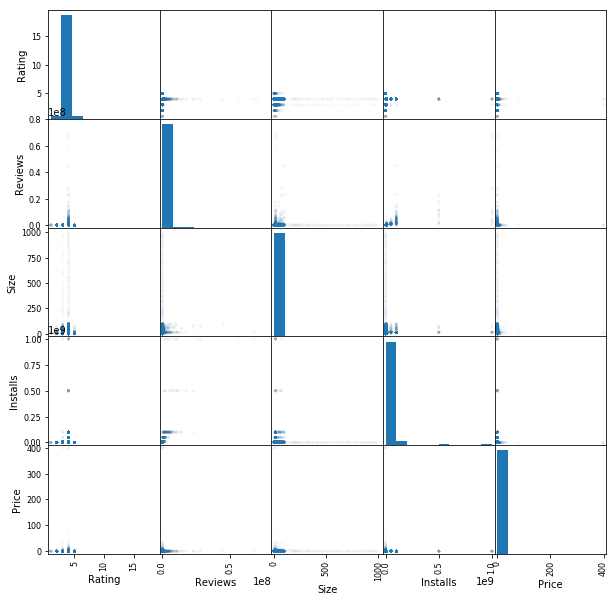

In [20]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

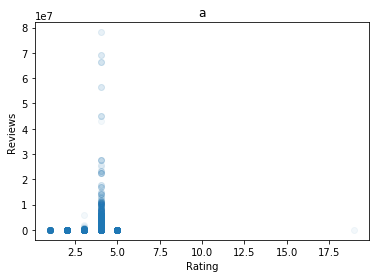

In [22]:
plt.plot(data['Rating'], data['Reviews'], 'o', alpha = 0.05)
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.title('a')
pass

# Проведём векторизацию.

In [23]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['Category', 'Content Rating']


In [24]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [26]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)
data_nonbinary.head()

Index(['Category_1.9', 'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING',
       'Category_EDUCATION', 'Category_ENTERTAINMENT', 'Category_EVENTS',
       'Category_FAMILY', 'Category_FINANCE', 'Category_FOOD_AND_DRINK',
       'Category_GAME', 'Category_HEALTH_AND_FITNESS',
       'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO',
       'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION',
       'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER',
       'Content Rating_Adults only 18+', 'Content Rating_Everyone',
       'Content Rating_Everyone 10+',

,Category_1.9,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Нормализация

In [27]:
data['Reviews'] = data['Reviews'].astype(int)
data['Size'] = data['Size'].astype(int) 
data['Installs'] = data['Installs'].astype(int) 

data_numerical = data[numerical_columns]
data_numerical.describe()

,Rating,Reviews,Size,Installs,Price
count,10841.000000,1.084100e+04,10841.000000,1.084100e+04,10841.000000
mean,3.810719,4.441121e+05,33.437045,1.546292e+07,1.027273
std,0.547520,2.927629e+06,91.210047,8.502557e+07,15.948971
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,6.000000,1.000000e+03,0.000000
50%,4.000000,2.094000e+03,15.000000,1.000000e+05,0.000000
75%,4.000000,5.476800e+04,28.000000,5.000000e+06,0.000000
max,19.000000,7.815831e+07,1020.000000,1.000000e+09,400.000000


In [28]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,Rating,Reviews,Size,Installs,Price
count,1.084100e+04,1.084100e+04,1.084100e+04,1.084100e+04,1.084100e+04
mean,-3.564532e-15,-2.514682e-16,-1.639563e-15,5.034510e-16,-9.792846e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.133546e+00,-1.516969e-01,-3.556302e-01,-1.818620e-01,-6.441001e-02
25%,3.457069e-01,-1.516839e-01,-3.008116e-01,-1.818503e-01,-6.441001e-02
50%,3.457069e-01,-1.509816e-01,-2.021383e-01,-1.806859e-01,-6.441001e-02
75%,3.457069e-01,-1.329896e-01,-5.961015e-02,-1.230562e-01,-6.441001e-02
max,2.774197e+01,2.654510e+01,1.081638e+01,1.157931e+01,2.501558e+01


Запишем все в таблицу

In [29]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)
data.describe()

(10841, 45)


,Rating,Reviews,Size,Installs,Price,Category_1.9,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
count,1.084100e+04,1.084100e+04,1.084100e+04,1.084100e+04,1.084100e+04,10841.000000,10841.000000,10841.000000,10841.000000,10841.000000,...,10841.000000,10841.000000,10841.000000,10841.000000,10841.000000,10841.000000,10841.000000,10841.000000,10841.000000,10841.000000
mean,-3.564532e-15,-2.514682e-16,-1.639563e-15,5.034510e-16,-9.792846e-16,0.000092,0.005996,0.007841,0.004889,0.021308,...,0.077760,0.023799,0.016142,0.007564,0.000277,0.803893,0.038188,0.046029,0.111429,0.000184
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.009604,0.077203,0.088203,0.069752,0.144416,...,0.267806,0.152428,0.126029,0.086645,0.016634,0.397069,0.191660,0.209558,0.314677,0.013582
min,-5.133546e+00,-1.516969e-01,-3.556302e-01,-1.818620e-01,-6.441001e-02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.457069e-01,-1.516839e-01,-3.008116e-01,-1.818503e-01,-6.441001e-02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.457069e-01,-1.509816e-01,-2.021383e-01,-1.806859e-01,-6.441001e-02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3.457069e-01,-1.329896e-01,-5.961015e-02,-1.230562e-01,-6.441001e-02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.774197e+01,2.654510e+01,1.081638e+01,1.157931e+01,2.501558e+01,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Изменим столбец Rating на бинарный признак. 1 - рейтинг > 4, 0 - рейтинг <= 4

In [30]:
data.loc[data['Rating'] <= 4.0, 'Rating'] = 0
data.loc[data['Rating'] > 4.0, 'Rating'] = 1
data.head()

,Rating,Reviews,Size,Installs,Price,Category_1.9,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,0.0,-0.151643,-0.158283,-0.181744,-0.06441,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.0,-0.151367,-0.213102,-0.175981,-0.06441,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.0,-0.121806,-0.278884,-0.123056,-0.06441,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.0,-0.078039,-0.092501,0.406196,-0.06441,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.0,-0.151367,-0.344666,-0.180686,-0.06441,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [31]:
X = data.drop(('Rating'), axis = 1) # выбрасываем столбец 'Rating'
y = data['Rating']
feature_names = X.columns
feature_names

Index(['Reviews', 'Size', 'Installs', 'Price', 'Category_1.9',
       'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING',
       'Category_EDUCATION', 'Category_ENTERTAINMENT', 'Category_EVENTS',
       'Category_FAMILY', 'Category_FINANCE', 'Category_FOOD_AND_DRINK',
       'Category_GAME', 'Category_HEALTH_AND_FITNESS',
       'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO',
       'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION',
       'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER',
       'Content Rating_Adults only 18+', 'Content Rating_E

# Обучающая и тестовая выборка
Данные готовы, создадим выборки.

In [32]:
print(X.shape)
print(y.shape)
N, d = X.shape

(10841, 44)
(10841,)


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

7588 3253


In [34]:
7588+3253

10841

# Обучение
Попробуем метод ближайших соседей.

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.00013178703215603585 0.0


Возникло переобучение.

Попробуем подобрать параметры.

In [36]:
'''
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)
'''

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.0001317870321559944 1


Переобучение все ещё присутствует.